# ExerciseThree

Student Name: Peisong Yang

Student ID: 19031379

DataBase: csv

***

## 1. Import packages and dataset 

&emsp;&emsp;Before start building the maching learning model, we need to import the package and all the data needed. In this exercise, I choose to use the housing dataset because there are lot of variables to play with.

In [278]:
# import packages
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import gplearn
from gplearn.genetic import SymbolicRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense,Activation

plotly.offline.init_notebook_mode(connected=True)

In [3]:
#set path
path = 'D:/UCL MSc/Big Data'
rawdb = "/iftbigdatacoursework2019/000.DataBases/csv/train.csv"

#import data
housingData = pd.read_csv(path+rawdb)

## 2. Basic descriptive statistics analysis

&emsp;&emsp;First, have a look at the data structure and the data types of columns.

In [4]:
housingData.head()

id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0       NaN       NaN  ...                           9   
1       NaN       NaN  ...                          15   
2       NaN       NaN  ...                          10   
3       NaN       NaN  ...                          11   
4       NaN       NaN  ...                         319   

  cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                          4                          0   
1                          3                          0   
2                          3                          0   
3                          2                          1   
4                        108                         17   

   big_church_count_5000  church_count_5000  mosque_count_5000  \
0                     13                 22                  1   
1                     15                 29                  1   
2                     11                 27                  0   
3                      4                  4                  0   
4                    135                236                  2   

   leisure_count_5000  sport_count_5000  market_count_5000  price_doc  
0                   0                52                  4    5850000  
1                  10                66                 14    6000000  
2                   4                67                 10    5700000  
3                   0                26                  3   13100000  
4                  91               195                 14   16331452  

[5 rows x 292 columns]

In [5]:
print("Basic information:")
housingData.info()

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [6]:
print("Type of each column:")
housingData.dtypes

Type of each column:


id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

In [7]:
housingData.describe()

id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805     28.265979      0.880148   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.967000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

       ...  cafe_count_5000_price_2500  cafe_count_5000_price_4000  \
count  ...                30471.000000                30471.000000   
mean   ...                   32.058318                   10.783860   
std    ...                   73.465611                   28.385679   
min    ...                    0.000000                    0.000000   
25%    ...                    2.000000                    1.000000   
50%    ...                    8.000000                    2.000000   
75%    ...                   21.000000                    5.000000   
max    ...                  377.000000                  147.000000   

       cafe_count_5000_price_high  big_church_count_5000  church_count_5000  \
count                30471.000000           30471.000000       30471.000000   
mean                     1.771783              15.045552          30.251518   
std                      5.418807              29.118668          47.347938   
min                      0.000000               0.000000           0.000000   
25%                      0.000000               2.000000           9.000000   
50%                      0.000000               7.000000          16.000000   
75%                      1.000000              12.000000          28.000000   
max                     30.000000             151.000000         250.000000   

       mosque_count_5000  leisure_count_5000  sport_count_5000  \
count       30471.000000        30471.000000      30471.000000   
mean            0.442421            8.648814         52.796593   
std             0.609269           20.580741         46.292660   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000         11.000000   
50%             0.000000            2.000000         48.000000   
75%             1.000000            7.000000         76.000000   
max             2.000000          106.000000        218.000000   

       market_count_5000     price_doc  
count       30471.000000  3.047100e+04  
mean            5.987070  7.123035e+06  
std             4.889219  4.780111e+06  
min             0.000000  1.000000e+05  
25%             1.000000  4.740002e+06  
50%             5.000000  6.274411e+06  
75%            10.000000  8.300000e+06  
max            21.000000  1.111111e+08  

[8 rows x 276 columns]

&emsp;&emsp;There are 30471 rows and 292 columns. And 276 of them are numerical. Some basic descriptive statistical data are shown above. 

&emsp;&emsp;Also as we can see there are NaNs in dataset, so don't forget to do data cleaning before regression.

&emsp;&emsp;Before that, let's plot some figures to see if any other cleaning work is needed.



## 3. Data visualization and data cleaning

### 3.1 Illustration on package used

&emsp;&emsp;In visualizing part, a very nice and easy package `plotly` and its lite version `plotly_express` will be used. You may need to install plotly before runing the code.

> pip install plotly

&emsp;&emsp;If the figure doesn't come out, please trust this note and use jupyter notebook instead of jupyterlab. Also, make sure that you are connected to the Internet.


> \$ jupyter labextension install @jupyterlab/plotly-extension 

> \$ jupyter trust ExerciseThree.ipynb

### 3.2 Plot figure of selected variables

&emsp;&emsp;Insensitivity, `full_sq` and `life_sq` are two of the most important factors, let's plot their relationship with `price_doc`.

In [8]:
px.scatter(housingData,y='price_doc',x='full_sq',title='price_doc vs. full_sq',height=300)

In [9]:
px.scatter(housingData,y='price_doc',x='life_sq',title='price_doc vs. life_sq',height=300)

### 3.3 Remove outliers

&emsp;&emsp;We can see there are outliers from the figures, let's remove data beyond $3\sigma$ and `NaN`. And plot again.

In [10]:
# column that need to be cleaned
targets =["full_sq","life_sq"]
# define a function to clean data
def clean_three_sigma(dfTemp,targets):
    
    df = dfTemp.copy(deep=True)
    
    # drop nan first
    df.dropna(subset=targets,inplace=True)
    
    # drop data beyond 3*sigma
    df.loc[:,'_removed$'] = False
    for target in targets:
        std = np.std(df[target],ddof=1)
        mean = np.mean(df[target])
        df.loc[(df[target]<mean-3*std)|(df[target]>mean+3*std),'_removed$'] = True
    df = df.loc[df['_removed$'] == False,:]
    
    df = df.drop('_removed$',axis=1)
        
    return df

# data cleaning

housingDataCleaned = clean_three_sigma(housingData,targets)


#manually remove some outliers
housingDataCleaned = housingDataCleaned[(housingDataCleaned['full_sq']>6)&(housingDataCleaned['life_sq']>6)&(housingDataCleaned['price_doc']<100000000)]
#plot figure
px.scatter(housingDataCleaned,y='price_doc',x='full_sq',trendline="ols",title='price_doc vs. full_sq',height=300)


In [11]:
fig = px.scatter(housingDataCleaned,y='price_doc',x='life_sq',color='sub_area',title='price_doc vs. life_sq',height=300)
fig.layout.update(showlegend=False)
fig.show()

&emsp;&emsp;The data looks better now after outliers are removed.

### 3.4 Some findings 

&emsp;&emsp;In the first figure, the straight line is the linear regression line using OLS method. We can see there actually is a trend between `full_sq` and `price_doc`. The function is given by $price\_doc=148125\cdot full\_sq-448099$, with $R^2=0.4$.

&emsp;&emsp;Colors in the second plot represent different regions. I would say it looks pretty randomly distributed.

### 3.5 Handeling object variables

&emsp;&emsp;There are 16 object variables, we can have a look on them and also the values in them.

In [12]:
housingDataCleaned.select_dtypes(include=object).head()

timestamp product_type           sub_area culture_objects_top_25  \
0  2011-08-20   Investment           Bibirevo                     no   
1  2011-08-23   Investment  Nagatinskij Zaton                    yes   
2  2011-08-27   Investment     Tekstil'shhiki                     no   
3  2011-09-01   Investment             Mitino                     no   
4  2011-09-05   Investment          Basmannoe                     no   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no                  no   
3                        no                 no                  no   
4                        no                 no                  no   

  radiation_raion railroad_terminal_raion big_market_raion  \
0              no                      no               no   
1              no                      no               no   
2             yes                      no               no   
3              no                      no               no   
4             yes                     yes               no   

  nuclear_reactor_raion detention_facility_raion water_1line big_road1_1line  \
0                    no                       no          no              no   
1                    no                       no          no              no   
2                    no                       no          no              no   
3                    no                       no          no              no   
4                    no                       no          no              no   

  railroad_1line    ecology  
0             no       good  
1             no  excellent  
2             no       poor  
3             no       good  
4            yes  excellent

In [13]:
objectColumns = []
print("Values in each columns(excluding timestamp and sub_area):")
for dtype in housingDataCleaned.select_dtypes(include=object):
    if dtype == 'timestamp' or dtype == 'sub_area':
        continue
    #use format control to make output prettier
    print('{dtype:<{len}}\t{data}'.format(dtype=dtype,data=housingDataCleaned[dtype].unique(),len=24-len(dtype.encode('GBK'))+len(dtype)))
    objectColumns.append(dtype)

Values in each columns(excluding timestamp and sub_area):
product_type            	['Investment' 'OwnerOccupier']
culture_objects_top_25  	['no' 'yes']
thermal_power_plant_raion	['no' 'yes']
incineration_raion      	['no' 'yes']
oil_chemistry_raion     	['no' 'yes']
radiation_raion         	['no' 'yes']
railroad_terminal_raion 	['no' 'yes']
big_market_raion        	['no' 'yes']
nuclear_reactor_raion   	['no' 'yes']
detention_facility_raion	['no' 'yes']
water_1line             	['no' 'yes']
big_road1_1line         	['no' 'yes']
railroad_1line          	['no' 'yes']
ecology                 	['good' 'excellent' 'poor' 'satisfactory' 'no data']


&emsp;&emsp;We can see the values is easy to transform into numbers.

In [14]:
housingDataTrans = housingDataCleaned.copy(deep=True)
for objectColumn in objectColumns:
    housingDataTrans[objectColumn] = pd.Categorical(housingDataTrans[objectColumn],housingDataTrans[objectColumn].unique())
    housingDataTrans[objectColumn] = housingDataTrans[objectColumn].cat.rename_categories(list(range(len(housingDataTrans[objectColumn].unique()))))
    housingDataTrans[objectColumn] = housingDataTrans[objectColumn].astype(int)

In [20]:
housingDataTrans[objectColumns].head()

product_type  culture_objects_top_25  thermal_power_plant_raion  \
0             0                       0                          0   
1             0                       1                          0   
2             0                       0                          0   
3             0                       0                          0   
4             0                       0                          0   

   incineration_raion  oil_chemistry_raion  radiation_raion  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                1   
3                   0                    0                0   
4                   0                    0                1   

   railroad_terminal_raion  big_market_raion  nuclear_reactor_raion  \
0                        0                 0                      0   
1                        0                 0                      0   
2                        0                 0                      0   
3                        0                 0                      0   
4                        1                 0                      0   

   detention_facility_raion  water_1line  big_road1_1line  railroad_1line  \
0                         0            0                0               0   
1                         0            0                0               0   
2                         0            0                0               0   
3                         0            0                0               0   
4                         0            0                0               1   

   ecology  
0        0  
1        1  
2        2  
3        0  
4        1

&emsp;&emsp;We can see from the chart that we have successfully turn the object variables into numeric variables.

### 3.6 Missing values

&emsp;&emsp;Before we apply regression to the dataset, we have to deal with `NaN` in the data. Basically, we have 2 ways to do this:

- Drop

- Fill

&emsp;&emsp;A simple way is to drop the entry as long as it contains `NaN`. But the drawback is, since there are lots of `NaN` in dataset, we will only have less than 6000 entries after the drop. So in this process, our dataset shrink from 23582 entries to less than 6000 entries -- it's 75% loss!

&emsp;&emsp;To solve this problem, we can fill `NaN` with the former or latter value. In this case, the dimension of our data will stay the same, but using this method can affect regression accuracy to some extent.

&emsp;&emsp;Here, I will adapt the second method to deal with missing values. After that, we can do the linear regression.

In [21]:
housingDataNumerical = housingDataTrans.copy(deep=True)
housingDataNumerical = housingDataNumerical.drop(['timestamp','sub_area'],axis=1)

In [22]:
housingDataNumerical.fillna(method='ffill',inplace=True)
# do it backwards to deal with NaN in the begaining
housingDataNumerical.fillna(method='bfill',inplace=True)

In [23]:
housingDataNumerical.head()

id  full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
0   1       43     27.0    4.0       17.0       1.0      1907.0       2.0   
1   2       34     19.0    3.0       17.0       1.0      1907.0       2.0   
2   3       43     29.0    2.0       17.0       1.0      1907.0       2.0   
3   4       89     50.0    9.0       17.0       1.0      1907.0       2.0   
4   5       77     77.0    4.0       17.0       1.0      1907.0       2.0   

   kitch_sq  state  ...  cafe_count_5000_price_2500  \
0      11.0    3.0  ...                           9   
1      11.0    3.0  ...                          15   
2      11.0    3.0  ...                          10   
3      11.0    3.0  ...                          11   
4      11.0    3.0  ...                         319   

   cafe_count_5000_price_4000  cafe_count_5000_price_high  \
0                           4                           0   
1                           3                           0   
2                           3                           0   
3                           2                           1   
4                         108                          17   

   big_church_count_5000  church_count_5000  mosque_count_5000  \
0                     13                 22                  1   
1                     15                 29                  1   
2                     11                 27                  0   
3                      4                  4                  0   
4                    135                236                  2   

   leisure_count_5000  sport_count_5000  market_count_5000  price_doc  
0                   0                52                  4    5850000  
1                  10                66                 14    6000000  
2                   4                67                 10    5700000  
3                   0                26                  3   13100000  
4                  91               195                 14   16331452  

[5 rows x 290 columns]

&emsp;&emsp;Now the dataset is clean and tidy. We can move to the next part.

## 4. Linear Regression

### 4.1 Regression with all variables

&emsp;&emsp; First, we can just use all variables to do the linear regression and see what happends.

In [305]:
# define dataset used
dataSet = housingDataNumerical

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

# regression
model = LinearRegression()
model.fit(X_train,y_train)

print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)}")

R_square of training set:0.5945604489442635,
R_square of test set:0.5760961545509122


### 4.2 Regression with most correlated variables

&emsp;&emsp;Then regression on 50 of most correlated variables:

In [67]:
# get correlation coefficient
corrCoef = housingDataNumerical.corr().price_doc

In [306]:
# find most correlated variables
numOfVar = 50
variableCorrelated = corrCoef.abs().sort_values(ascending=False).index[1:numOfVar+2]
variableCorrelated = variableCorrelated.to_list()

# add dependent variable back
variableCorrelated.append('price_doc')

# define dataset uesd
dataSet = housingDataNumerical.loc[:,variableCorrelated]

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

# regression
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)}")

R_square of training set: 0.5427071491306352,
R_square of test set: 0.5400852400655763


&emsp;&emsp;It seems to have some good results. Let's have a detailed look into the regression.

In [130]:
X = sm.add_constant(X_train)
y = y_train
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_doc   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:20:40   Log-Likelihood:            -3.0905e+05
No. Observations:               18865   AIC:                         6.182e+05
Df Residuals:                   18814   BIC:                         6.186e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.684e+06   4.82e+05     -5.574      0.000   -3.63e+06   -1.74e+06
full_sq                     1.654e+05   2393.278     69.107      0.000    1.61e+05     1.7e+05
life_sq                    -2.163e+04   2548.332     -8.488      0.000   -2.66e+04   -1.66e+04
num_room                   -1.622e+05   3.94e+04     -4.112      0.000    -2.4e+05   -8.49e+04
sport_count_5000            1206.5228   3228.066      0.374      0.709   -5120.777    7533.822
sport_count_3000            1601.6611   5915.302      0.271      0.787   -9992.864    1.32e+04
office_sqm_5000                0.3650      0.080      4.572      0.000       0.209       0.521
trc_count_5000              1.637e+04   5470.724      2.992      0.003    5647.449    2.71e+04
sport_count_2000             2.06e+04   1.03e+04      2.003      0.045     444.812    4.08e+04
cafe_count_5000_price_1000 -2.028e+04   6276.346     -3.231      0.001   -3.26e+04   -7976.652
cafe_count_5000_price_1500  1.742e+04   6580.123      2.647      0.008    4517.949    3.03e+04
kremlin_km                  1.115e+06    1.6e+05      6.964      0.000    8.01e+05    1.43e+06
sadovoe_km                 -1.603e+06   1.49e+05    -10.736      0.000    -1.9e+06   -1.31e+06
cafe_count_5000             9999.5158   3904.089      2.561      0.010    2347.149    1.77e+04
bulvar_ring_km              3.479e+05   1.29e+05      2.691      0.007    9.45e+04    6.01e+05
cafe_count_5000_na_price   -4.736e+04   9611.725     -4.927      0.000   -6.62e+04   -2.85e+04
zd_vokzaly_avto_km         -5.041e+04   1.46e+04     -3.454      0.001    -7.9e+04   -2.18e+04
cafe_count_5000_price_2500  3.214e+04   9182.785      3.500      0.000    1.41e+04    5.01e+04
sport_count_1500            1.324e+04   1.31e+04      1.007      0.314   -1.25e+04     3.9e+04
cafe_count_5000_price_500  -1.718e+04   6437.743     -2.668      0.008   -2.98e+04   -4559.585
ttk_km                      1.574e+05      6e+04      2.623      0.009    3.98e+04    2.75e+05
office_sqm_3000               -0.3738      0.135     -2.759      0.006      -0.639      -0.108
cafe_count_5000_price_high  9.189e+04   3.13e+04      2.937      0.003    3.06e+04    1.53e+05
office_count_5000          -2391.2803   2919.471     -0.819      0.413   -8113.706    3331.145
cafe_count_5000_price_4000 -4.663e+04   1.13e+04     -4.143      0.000   -6.87e+04   -2.46e+04
trc_sqm_5000                  -0.2093      0.068     -3.094      0.002      -0.342      -0.077
trc_count_3000              5608.6894   7894.455      0.710      0.477   -9865.154    2.11e+04
sport_objects_raion          1.21e+04   6387.431      1.894      0.058    -423.273    2.46e+04
church_count_5000           5968.9075   6024.163      0.991      0.322   -5838.995    1.78e+04
nuclear_reactor_km         -2.269e+04   1.1

&emsp;&emsp;We can see that there may have a multicollinearity problem, and it will give us higher R_square. So we need to eliminate that effect.

## 5. Principal component analysis (PCA)

&emsp;&emsp;In last section, we have 290 numerical variables. This is a lot for regression. Also, we have a multicollinearity problem on the model above. So, let's now use PCA to reduce the dimension of the dataset.

### 5.1 Standerdization

&emsp;&emsp;Before we apply PCA to the dataset, one important thing we need to do is standerdizing, since the scale difference can have an effect on the PCA result. Here, I will standerdizing all the numerical columns except 0-1 category ones.

In [132]:
# get columns that need to do standerdization
PCAColumns = list(housingDataNumerical.columns)
PCAColumns=list(set(PCAColumns)-set(objectColumns))

# standerdizing
dataToPCA = housingDataNumerical.loc[:, PCAColumns].values
dataToPCA = StandardScaler().fit_transform(dataToPCA)

# make it DataFrame
dataToPCA = pd.DataFrame(dataToPCA,index=housingDataNumerical.index,columns=PCAColumns)

# add 0-1 category column back
dataToPCA = pd.concat([dataToPCA, housingDataNumerical[objectColumns]],axis=1,sort=False)

# make price_doc the last column
tempPrice_doc = dataToPCA['price_doc']
dataToPCA.drop('price_doc',axis=1,inplace=True)
dataToPCA['price_doc'] = tempPrice_doc

### 5.2 Determine the number of components

&emsp;&emsp;To determine the `number of components`, I choose to run PCA when `number of components` changes from 1 to 50. And see the performance of each model.


In [133]:
noiceVar = []; expVarRatio = []; score=[]
maxComponent = 50
maxComponent += 1 # don't change this line
for i in range(1,maxComponent):
    PCRModel = PCA(n_components=i)
    PCRModel.fit(dataToPCA.iloc[:,:-1])
    noiceVar.append(PCRModel.noise_variance_)
    expVarRatio.append(sum(PCRModel.explained_variance_ratio_))
    score.append(PCRModel.score(dataToPCA.iloc[:,:-1]))

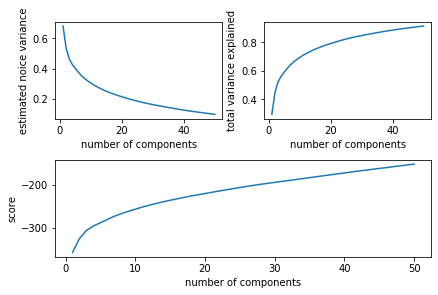

<Figure size 1152x648 with 0 Axes>

In [137]:
plt.subplot(221)
plt.xlabel("number of components")
plt.ylabel("estimated noice variance")
plt.plot(range(1, maxComponent), noiceVar)

plt.subplot(222)
plt.xlabel("number of components")
plt.ylabel("total variance explained")
plt.plot(range(1, maxComponent), expVarRatio)

plt.subplot(212)
plt.xlabel("number of components")
plt.ylabel("score")
plt.plot(range(1, maxComponent), score)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)

plt.figure(figsize=(16,9))
plt.show()


&emsp;&emsp;The performances of every number are shown above.

&emsp;&emsp;To determine the component number, I will use the minimum number of components that could explain more than 90% of the total variance.

In [135]:
expVarRatio = np.array(expVarRatio)
numOfComponent = np.where(expVarRatio > 0.9)[0][0]
expVarRatio[numOfComponent]
print(f"The number of component should be {numOfComponent+1}, and the explained Var is {expVarRatio[numOfComponent]}.")
numOfComponent += 1

The number of component should be 45, and the explained Var is 0.9018154022053085.


### 5.3 Run PCA

&esmp;&emsp;In this part, we run the PCA using the right `number of component` and transform the dataset into a lower dimension one.

In [136]:
# run PCA and get variables after reducing dimension
PCRModel = PCA(n_components=numOfComponent)
dataAfterPCA = PCRModel.fit_transform(dataToPCA.iloc[:,:-1])

# make it a DataFrame
dataAfterPCA = pd.DataFrame(dataAfterPCA,index=dataToPCA.index)

# add the dependent variable back
dataAfterPCA['price_doc'] = dataToPCA['price_doc']

## 6. Maching Learning after PCA

&emsp;&emsp;After we run PCA, we can do regression without multicollinearity problem. Let's try some linear model first.

### 6.1 Generalized linear regression models

&emsp;&emsp;Here are some linear models and the regression results.

#### 6.1.1 OLS

In [307]:
# define dataset used
dataSet = dataAfterPCA

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

# regression
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.intercept_
model.coef_
model.score(X_train,y_train),model.score(X_test,y_test),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.5049862035871695,
R_square of test set: 0.4971000819247756,
MSE of test set: 0.491731421449835


#### 6.1.2 Lasso regression

In [308]:

model = linear_model.Lasso(alpha=0.1)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.4367720036311118,
R_square of test set: 0.43116543054232037,
MSE of test set: 0.5562017836069517


#### 6.1.3 Ridge regression

In [309]:
model = linear_model.Ridge(alpha=0.5)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.5049862035287345,
R_square of test set: 0.497100183404507,
MSE of test set: 0.4917313222237847


### 6.2 Non-linear regression models

&emsp;&emsp;Here are some non-linear models:

#### 6.2.1 Desicion tree

In [310]:
# desicion tree
# define dataset used
dataSet = dataAfterPCA

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_train,y_train),model.score(X_test,y_test),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.9999999997998419,
R_square of test set: 0.18779147868406254,
MSE of test set: 0.794170840649478


#### 6.1.2 Random forest

In [311]:
# random forest
# define dataset used
dataSet = dataAfterPCA

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
model.score(X_train,y_train),model.score(X_test,y_test),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.9181626499820711,
R_square of test set: 0.559079026290102,
MSE of test set: 0.431128917219235


#### 6.1.3 Regression with non-linear features

In [312]:
# define dataset used
dataSet = dataAfterPCA

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

# functions used by the symbolic transformer
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = gplearn.genetic.SymbolicTransformer(generations=40, population_size=4000,
                         hall_of_fame=50, n_components=3,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)
gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.10        0.0401439        4         0.515702         0.491302      5.29m
   1     5.20         0.159838        5         0.521661         0.565555      4.37m
   2     4.60         0.367824        6         0.549654         0.497602      4.12m
   3     2.59         0.478869        8         0.571743         0.551517      3.64m
   4     5.30         0.459639        8         0.588318          0.52606      3.97m
   5     7.57         0.499743       12         0.601978         0.626575      4.30m
   6    11.19         0.527421       24         0.643448          0.66898      4.74m
   7    16.16         0.552384       18         0.670697         0.650512      5.51m
   8    22.00         0.568699       28         0.678774         0.634331  

SymbolicTransformer(const_range=(-1.0, 1.0), feature_names=None,
                    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    generations=40, hall_of_fame=50, init_depth=(2, 6),
                    init_method='half and half', low_memory=False,
                    max_samples=0.9, metric='pearson', n_components=3, n_jobs=1,
                    p_crossover=0.9, p_hoist_mutation=0.01,
                    p_point_mutation=0.01, p_point_replace=0.05,
                    p_subtree_mutation=0.01, parsimony_coefficient=0.0005,
                    population_size=4000, random_state=0, stopping_criteria=1.0,
                    tournament_size=20, verbose=1, warm_start=False)

In [313]:
# transform features into non-linear features
gp_features = gp.transform(dataSet.iloc[:,:-1])

# stack linear and non-linear features
dataNonlinear = np.hstack((dataSet.iloc[:,:-1], gp_features))
dataNonlinear = pd.DataFrame(dataNonlinear,index=dataSet.index)
dataNonlinear['price_doc'] = dataSet['price_doc']

In [314]:
# ridge regression using non-linear features
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataNonlinear.iloc[:,:-1],dataNonlinear.iloc[:,-1], test_size=0.2, random_state=default_seed)

model = linear_model.Ridge(alpha=0.5)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {model.score(X_train,y_train)},\nR_square of test set: {model.score(X_test,y_test)},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.5629101962965363,
R_square of test set: 0.5662781401349642,
MSE of test set: 0.4240896826580876


&emsp;&emsp;We can see non-linear features are effective and make some difference compared to the ridge regression model.

#### 6.1.4 Neural network

In [329]:
# neural network
# define dataset used
dataSet = dataAfterPCA

# split data into training set and test set
default_seed = 9
X_train, X_test, y_train, y_test = train_test_split(dataSet.iloc[:,:-1],dataSet.iloc[:,-1], test_size=0.2, random_state=default_seed)

model = Sequential([
    Dense(30,input_dim=len(X_train.columns)),
    Activation('relu'),
    Dense(10),
    Activation('relu'),
    Dense(1),
    Activation('relu'),
]
)

# compile
model.compile(loss='mse',optimizer='rmsprop')

# training
model.fit(X_train,y_train,epochs=60,batch_size=1024)



Epoch 1/60
18865/18865 [==============================] - 0s 5us/step - loss: 1.0059
Epoch 2/60
18865/18865 [==============================] - 0s 2us/step - loss: 1.0049
Epoch 3/60
18865/18865 [==============================] - 0s 2us/step - loss: 0.9987
Epoch 4/60
18865/18865 [==============================] - 0s 2us/step - loss: 0.9104
Epoch 5/60
18865/18865 [==============================] - 0s 2us/step - loss: 0.7740
Epoch 6/60
18865/18865 [==============================] - 0s 2us/step - loss: 0.6892
Epoch 7/60
18865/18865 [==============================] - 0s 2us/step - loss: 0.6368
Epoch 8/60
18865/18865 [==============================] - 0s 2us/step - loss: 0.6025
Epoch 9/60
18865/18865 [==============================] - 0s 3us/step - loss: 0.5804
Epoch 10/60
18865/18865 [==============================] - 0s 3us/step - loss: 0.5632
Epoch 11/60
18865/18865 [==============================] - 0s 3us/step - loss: 0.5552
Epoch 12/60
18865/18865 [==============================] - 0s 2

In [330]:
r2_score(y_train,model.predict(X_train)),r2_score(y_test,model.predict(X_test)),mean_squared_error(y_test,model.predict(X_test))
print(f"R_square of training set: {r2_score(y_train,model.predict(X_train))},\nR_square of test set: {r2_score(y_test,model.predict(X_test))},\nMSE of test set: {mean_squared_error(y_test,model.predict(X_test))}")

R_square of training set: 0.5412066467007322,
R_square of test set: 0.4688045767912167,
MSE of test set: 0.5193985346464707


***